In [206]:
import pandas as pd
from mat4py import loadmat
from matplotlib import pyplot as plt
import re
from IPython.display import Image
# import plotly
from keras.preprocessing.image import ImageDataGenerator
import tensorboard

# Load meta data

In [207]:
# Open the meta data
train_df = pd.DataFrame(loadmat('./data/lists/train_list.mat'))
test_df = pd.DataFrame(loadmat('./data/lists/test_list.mat'))
train_df.shape, test_df.shape

((12000, 3), (8580, 3))

In [208]:
# Clean df
train_df = train_df.applymap(lambda x: x[0])
test_df = test_df.applymap(lambda x: x[0])
train_df.head()

,file_list,annotation_list,labels
0,n02085620-Chihuahua/n02085620_5927.jpg,n02085620-Chihuahua/n02085620_5927,1
1,n02085620-Chihuahua/n02085620_4441.jpg,n02085620-Chihuahua/n02085620_4441,1
2,n02085620-Chihuahua/n02085620_1502.jpg,n02085620-Chihuahua/n02085620_1502,1
3,n02085620-Chihuahua/n02085620_1916.jpg,n02085620-Chihuahua/n02085620_1916,1
4,n02085620-Chihuahua/n02085620_13151.jpg,n02085620-Chihuahua/n02085620_13151,1


# Filter data

In [209]:
# Extract first n labels
N_LABELS = 3
train_df = train_df[train_df['labels'] <= N_LABELS]
test_df = test_df[test_df['labels'] <= N_LABELS]
train_df.shape, test_df.shape

((300, 3), (289, 3))

# Explore data

In [210]:
# Show number of samples per labels
train_df['labels'].value_counts()

1    100
2    100
3    100
Name: labels, dtype: int64

In [211]:
test_df['labels'].value_counts()

3    152
2     85
1     52
Name: labels, dtype: int64

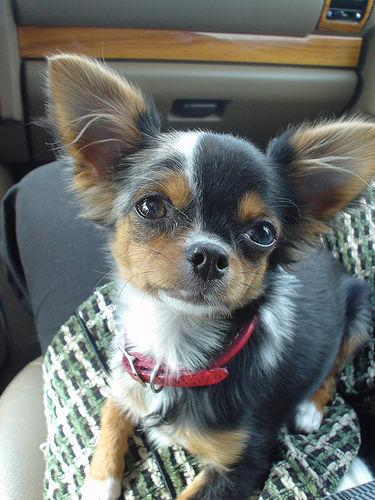

In [212]:
images_path = './data/Images/'

# Show a random picture
sample = train_df.sample(1)
sample_path = sample['file_list'].values[0]
Image(filename=images_path+sample_path) 


# Preprocessing

In [213]:
# Setting labels dtype for the generator
train_df['labels'] = train_df['labels'].astype(str)
test_df['labels'] = test_df['labels'].astype(str)

The VGG16 model was trained was trained with 224x224 pictures, therefore, we are rescaling the dataset pictures to this resolution:

In [217]:
data_generator = ImageDataGenerator(rescale=255)

# Defining the arguments for both generators
generator_settings = {
    'directory': images_path,
    'x_col': 'file_list',
    'y_col': 'labels',
    'class_mode': 'categorical',
    'target_size': (224,224),
    'batch_size': 32}

train_generator = data_generator.flow_from_dataframe(
    dataframe=train_df,
    # subset='training',
    **generator_settings)

validation_generator = data_generator.flow_from_dataframe(
    dataframe=test_df,
    # validation_split=0.8,
    # subset='validation',
    **generator_settings)

Found 300 validated image filenames belonging to 3 classes.
Found 289 validated image filenames belonging to 3 classes.
